In [18]:
import os

import numpy as np
import pandas as pd

import zipfile

from scipy import stats
from matplotlib import pyplot

# load prompt phrase scores

In [9]:
f = zipfile.ZipFile('./tmp/2023-12-04-phrase-scores-probability-environmental.zip')
df = pd.read_csv(f.open('2023-12-04-phrase-scores-probability-05-environmental-positive.csv'))
df

,index,phrase,occurrences,token length,boltzman_temperature,boltzman k,score,boltzman probability,normalized probability,unsmooth cumulative probability,normalized with epsilon,smooth cumulative probability
0,0,environmental D,28941,3,0.5,1.0,-6.028159,5.807746e-06,-246.431058,-9.357335e+07,2.580879e-06,0.020006
1,1,D side scrolling,37016,3,0.5,1.0,72.349869,6.955010e+62,-89.675002,-2.653694e+02,9.391688e-07,0.999998
2,2,D side scrolling video game,39924,5,0.5,1.0,72.319138,6.540412e+62,-89.736464,-3.551058e+02,9.398125e-07,0.999997
3,3,video game,47624,2,0.5,1.0,2.277691,9.514309e+01,-229.819358,-7.369090e+06,2.406905e-06,0.922826
4,4,D environmental,30753,2,0.5,1.0,49.366970,7.578885e+42,-135.640800,-7.563040e+02,1.420570e-06,0.999993
...,...,...,...,...,...,...,...,...,...,...,...,...
409024,409024,walking in a passageway in london,1,8,0.5,1.0,0.161925,1.382440e+00,-234.050890,-7.045226e+07,2.451222e-06,0.262154
409025,409025,defraction spikes,1,3,0.5,1.0,0.243441,1.627235e+00,-233.887858,-6.453938e+07,2.449514e-06,0.324080
409026,409026,dressed in a scholars robe,1,6,0.5,1.0,0.175111,1.419383e+00,-234.024518,-6.948990e+07,2.450945e-06,0.272233
409027,409027,missing tail.,1,3,0.5,1.0,0.300110,1.822520e+00,-233.774520,-6.040969e+07,2.448327e-06,0.367330


# histogram of score

In [20]:
score = df['score'].values

Text(0.5, 1.0, 'histogram of score (log scale)')

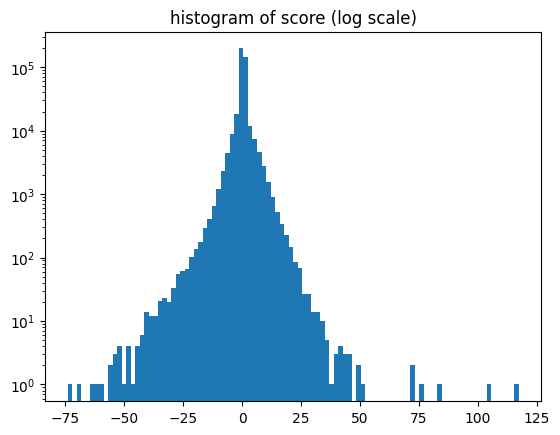

In [21]:
_ = pyplot.hist(score, bins=100, log=True)
pyplot.title('histogram of score (log scale)')

# normal test

In [22]:
stats.kstest(score, 'norm', args=(np.mean(data), np.std(data)))

KstestResult(statistic=0.3163742561707882, pvalue=0.0, statistic_location=0.999999, statistic_sign=1)

# histogram of probability

In [23]:
boltzman_k = 1
boltzman_temperature = 2

In [24]:
probability = np.exp(-(score / (boltzman_k * boltzman_temperature)))

Text(0.5, 1.0, 'histogram of probability, temperature 2 (log scale)')

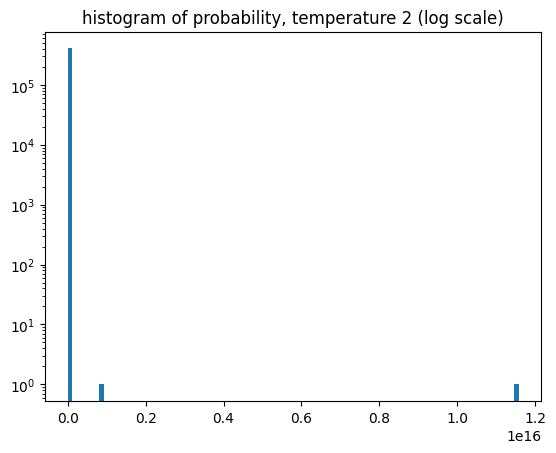

In [25]:
_ = pyplot.hist(probability, bins=100, log=True)
pyplot.title(f'histogram of probability, temperature {boltzman_temperature} (log scale)')